# Sound source localization with a microphones array : beamforming approaches

We have characterized and analyzed the sound propagation in the previous practical. We will now
exploit theses properties to infer one sound source position $(\omega, \rho, t)$. A linear microphone array made of $N=8$ omnidirectional MEMS microphones. The system we will be using is the same as before; thus, most of the code we already wrote to acquire signals, plot them, etc. will remain the same. In all the following, the acquisition system will work with a sampling frequency $F_s = 20$kHz, and with a buffer of size $\texttt{BLK} = 2048$.

### Sound Source Localization Using Beamforming

Acoustic localization is a technique for measuring the intensity and direction of a sound source. A popular technique for its calculation is the "Sum-and-Delay" beamforming algorithm, which generates an approximate angle of its location while reducing noise in the signal.     

Beamforming relies on different speakers responding to the same input signal in different ways, such as delaying the signal slightly, playing it at different volumes, or using cancellation effects. The different speaker settings allow the system to control the size, shape and direction of the sound wave.  These operations are performed using the directivity diagram $D(r,k)$ which represents the spatial and spatial and frequency filtering performed by the microphone array

In [2]:
# All required import
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from client import array
import time
%matplotlib inline
# %matplotlib notebook

In [56]:
#antenne=array('server') # When performing real-time acquisition
antenne=array('play')   # When playing recorded files

In [6]:
antenne=array('play') 

In [9]:
# Load acquisition and array parameters from the antenne variable, after launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace
# Read an audio buffer
m = antenne.read()

### 1) To begin, start the acquisition of the audio system, and capture one audio buffer. Plot the resulting signals as a function of time.

<IPython.core.display.Javascript object>


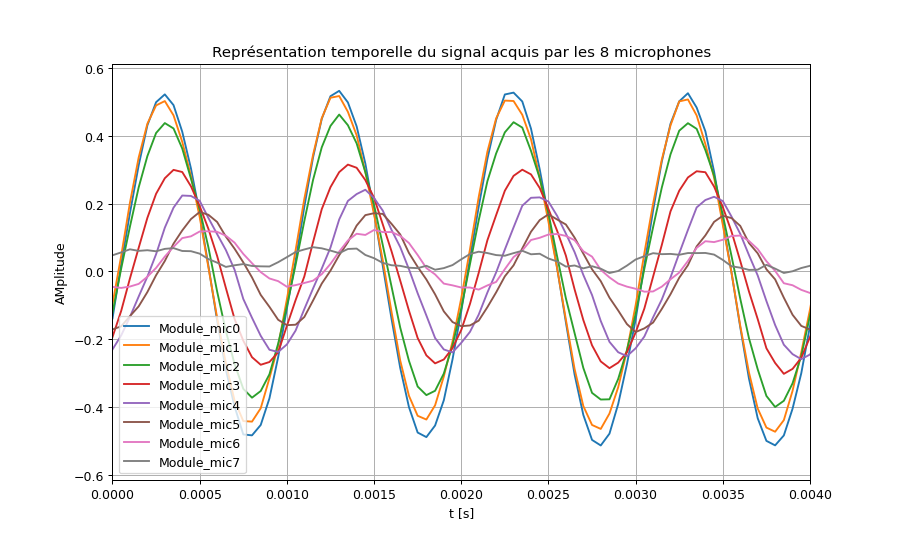

In [11]:


# Read an audio buffer
t = [i/Fs for i in range(m.shape[1])]

plt.figure(figsize=(10,6))
for i in range(len(m)):
    plt.plot(t, m[i],label=f'Module_mic{i}')
plt.xlabel("t [s]")
plt.ylabel("AMplitude")
plt.title("Représentation temporelle du signal acquis par les 8 microphones")
plt.xlim(0,0.004)
plt.legend()
plt.grid()
plt.show()
# TE BE COMPLETED

We note that there is a phase shift for each microphone acquisition {m0, m1, ..., m7}. This is due to the distance between the source and each microphone. In the graph below, we can deduce that the source is placed on the side where microphone m0 is located, because the m0 signal is ahead of the others and contains the largest amplitude.   

## 2.1/ Coding the beamformer filters and analyzing their properties

**These first questions have to be prepared before the practical session**

### 2) Write the position $z_n$ as a function of $n$ and interspace $d$. As a convention, the first microphone number is selected as $0$.

One can write :
$$z_n = d\times(n - \frac{N+1}{2})$$

### 3) Propose a function $\texttt{beam_filter}$ returning the filter frequency response for one microphone number $\texttt{mic_nb}$. 

In [9]:
def beam_filter(array, freq_vector, theta0=0, mic_nb: int = 0):
    """Compute the filter frequency response of a DSB beamformer for one microphone

    Args:
        array (array_server obj): array structure controlling the acquisition system.
        freq_vector (np.array): frequency vector. 
        theta0 (int, optional): focusing angular direction (in degrees). Defaults to 0.
        mic_id (int, optional): microphone id. Defaults to 0.

    Returns:
        np.array: the filter frequency response. Shape is (len(freq_vector),).
    """
    N = array.mems_nb
    d = array.interspace
    # Microphone position x
   
    z = d*(mic_nb-((N+1)/2))
    # Filter's frequency response
    W = np.exp(-1j*2*np.pi* (freq_vector/340) *z*np.cos(theta0 * np.pi/180))
    return W

the function `beam_filter()` calculates the frequency response of a DSB beamformer filter for a microphone. This function is needed to compensate for the retared for each microphone with respect to the microphone located in the $(O, z) = (0, 0)$ axis. Thus, in the end, all the signals are summed up to obtain a single signal.

### 4) Plot the two frequency responses obtained for two filters associated to two different microphone outputs when $\theta_0=0^\circ$ and for frequencies between $0$ and $5$kHz. Explain the effect of these filters on the signals.

<IPython.core.display.Javascript object>


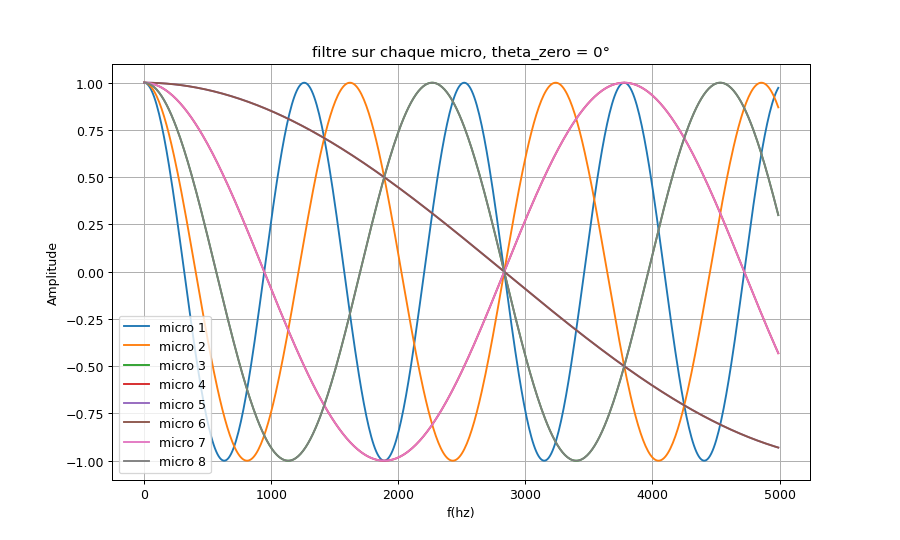

In [15]:
F = np.arange(0, 5000, Fs/BLK)
plt.figure(figsize=(10,6))
for i in range(N):
    W90 = beam_filter(antenne, F, 0, i)
    plt.plot(F, W90, label = f"micro {i+1}")
plt.title("filtre sur chaque micro, theta_zero = 0°")
plt.xlabel("f(hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


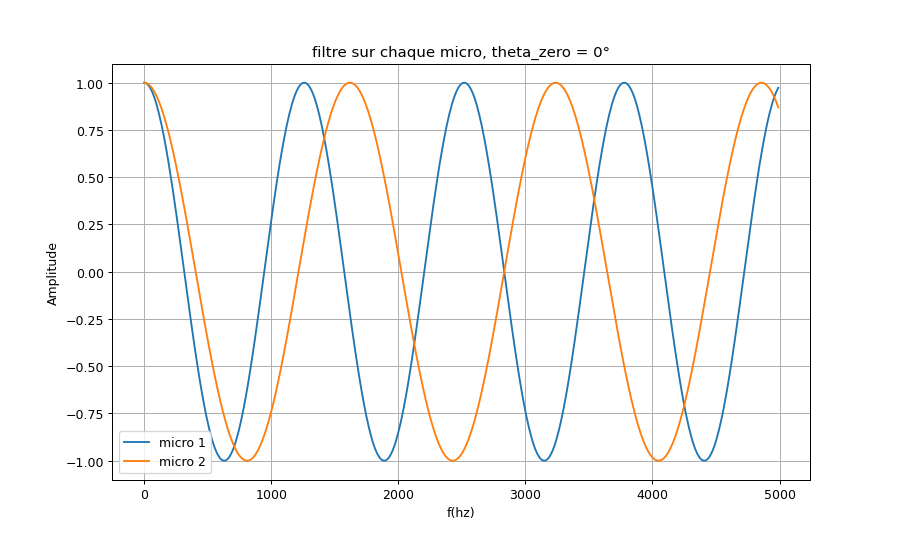

In [17]:
F = np.arange(0, 5000, Fs/BLK)
plt.figure(figsize=(10,6))
for i in range(2):
    W90 = beam_filter(antenne, F, 0, i)
    plt.plot(F, W90, label = f"micro {i+1}")
plt.title("filtre sur chaque micro, theta_zero = 0°")
plt.xlabel("f(hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

- On remarque que pour $\f1_1$ = $\f1 _2$ = 0 Hz, le premier pics des deux signaux est le même, or que pour le deuxième pic il sera pour le microphone N°1 à une fréquence $\f2 _1$ égale à environ 1245 Hz et pour le microphone N°2 à une fréquence $\f2 _2$ environ 1615 Hz.  Même remarque troisième pic, $\f3 _1$ = 2515 Hz et $\f3 _2$ = 3245 Hz.
- Quand on applique les filtres à nos 8 microphones on ajoute un retard en fonction de $\theta _0$, en fonction de ce dérnier et lors de la sommation on aura des ondes destructive ce qui nous permetrra d'avoir une bande passnte de theta pour la quelle notre array laissera passer le son. 

### 5) Compare again the filters obtained when $\theta_0 = 90^\circ$. Explain the differences.

<IPython.core.display.Javascript object>


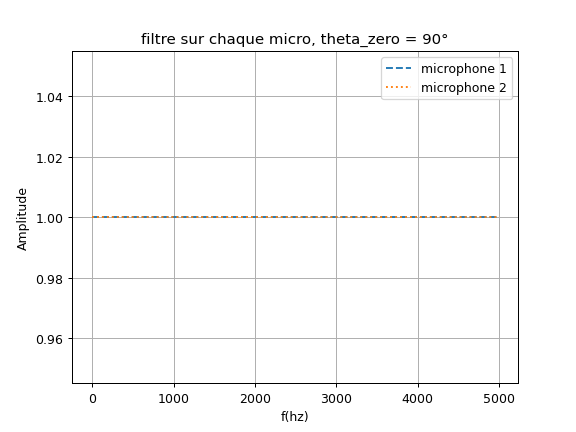

In [37]:
F = np.arange(0, 5000, Fs/BLK)
plt.figure()
W90 = beam_filter(antenne, F, 90, 0)
plt.plot(F, W90, label = "microphone 1",linestyle='--' )
W90 = beam_filter(antenne, F, 90, 0)
plt.plot(F, W90, label = "microphone 2",linestyle=':')
plt.title("filtre sur chaque micro, theta_zero = 90°")
plt.xlabel("f(hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


Pour $\theta _0$ = 90° on aura cos(90°) = 0, dans ce cas l'exponentielle vaut 1. </br>
Ainsi chaque filtre sera égal à 1 et n'auront aucun effet sur les micros. </br>
Dans le domamine fréquentielle l'effet du beamforming vu en cour sera constater lors de la sommation de chaque microphones,
on va choisir uniquement les angles à 90° avec plus au moins quelques degrés. 


## 2.2/ Using the filters : coding of the beamforming
Basically, the beamforming algorithm is the following :

- (a) acquire an audio frame
- (b) compute the corresponding FFT
- (c) analyze the FFT to define which frequency(ies) you would like to localize
- (d) restrict the FFT to the frequencies of interest
- (e) for one given ✓ 0 , for the frequencies selected before, and for each microphone :
  — compute the corresponding filters frequency responses with the beam_filter func-
tion
  — apply these filters to the microphone outputs
- (f) compute the beamformer output associated to the angular polarization ✓ 0
- (g) repeat all these last steps for each ✓ 0 you want to test
- (h) finally, decide of the angular position of the source by detecting for which ✓ 0 the beam-
former output is maximum.

### 6) Step (a) and (b) : After acquiring an audio buffer, compute its FFT in an array $\texttt{M_fft}$. Plot the result of this analysis as a function of the frequency when emitting a pure sine tone with a frequency $F_0 = 1$kHz.

<IPython.core.display.Javascript object>


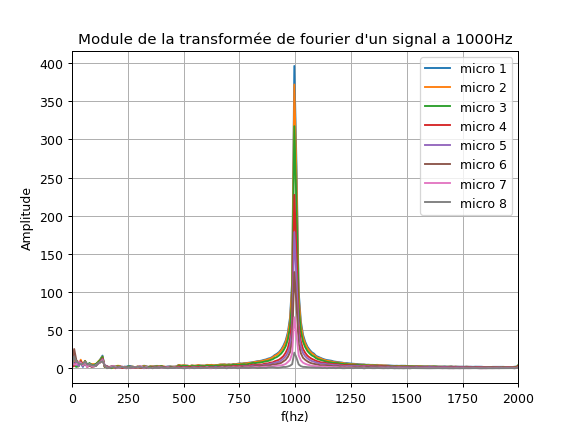

In [39]:
F0 =  1000
Freq  = np.arange(0, Fs, Fs/BLK)
Mfft = np.fft.fft(m)
plt.figure()
for i in range(len(Mfft)):
    plt.plot(Freq, np.abs(Mfft[i]),  label = f"micro {i+1}")
plt.title("Module de la transformée de fourier d'un signal a 1000Hz")
plt.xlabel("f(hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.xlim((0,2000))
plt.show()


On commence notre analyse sur l'axe des fréquences, on remarque bien des pics au alentour des 1000 Hz qui est tout à fait logique car c'est notre fréquence d'intérêt, néanmoins un leger bruit est présent entre 0 et 200 Hz. 
Ce bruit est justifié par plusieurs facteur : le bruit du néon (entre 50 et 70 Hz) , le bruit des peronnes qui parlent durant l'enregistrement (entre 75 à 140 Hz pour les hommes et 170 à 250 Hz pour les femmes).

<IPython.core.display.Javascript object>


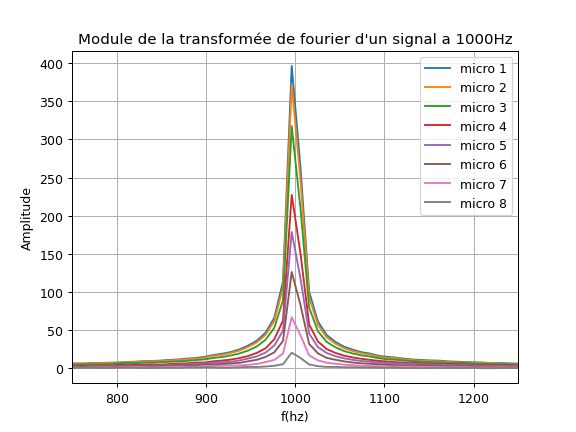

In [41]:
plt.figure()
for i in range(len(Mfft)):
    plt.plot(Freq, np.abs(Mfft[i]),  label = f"micro {i+1}")
plt.title("Module de la transformée de fourier d'un signal a 1000Hz")
plt.xlabel("f(hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.xlim((750,1250))
plt.show()


on poursuit notre analyse sur l'axe d'amplitude, on remaque que l'amplitude du microphone N°1 est 16 fois plus importante que celle du microphones N°8 ce qui tout à fait logique car L'enregistement a été effectué avec un angle theta environ = à 40 degré.

étant donné que la source est proche (pas vraiment a l'infini), le téléphone étant très orienté vers le micro 1 et 2, leur amplitude est plus grande


Contraitement au domaine temporal, dans le domaine fréquentiel on ne remarque pas de retard. 

### 7) Step (c) and (d) : Among all the frequencies you obtained from the FFT, select the one corresponding to the source frequency. Give its exact value and index $k_0$ in the frequency array, and collect the corresponding FFT values of each microphone outputs in one vector $\texttt{M}$ of length $N$.

In [42]:

k0 = (np.argmin(np.abs(Freq - F0)))
print("k0:",k0)
print("Frequence a k0:", Freq[k0])

M = []
Mft = np.fft.fft(m)
M = Mft[:,k0] 


print("Valeurs de M : ")
print(M)
k0_1 = np.argmax(np.array(Mft[3,:]))

k0: 102
Frequence a k0: 996.09375
Valeurs de M : 
[327.94481532-222.1769637j  315.75014689-196.38093693j
 246.87156652-199.21726865j 119.51134569-193.36105355j
   4.43330988-178.50163788j -51.20351159-115.30033294j
 -32.88598499 -58.2631407j   19.52642306  -6.46148704j]


On a déteerminé l'indice k0 pour le quel on observe le pics à notre fréquence d'intret qui est de 1000 Hz,
ensuite on calcule la FFT et on extrait la réponse de chaque microphones (c'est pour ca que la matrice est composée de 8 valeurs complex).

### 8) Step (e) : In a loop among all microphones, compute each filters for the position $\theta_0$ and for the frequency value you obtained in the previous step. Apply then these filters to the array $\texttt{M}$ defined before.

In [45]:
W= []
for i in range(N):
    W.append(beam_filter(antenne, Freq[k0], theta0 = 0, mic_nb=i))

W = np.array(W)
YW = W*M
print(YW)

[-131.25802464-373.74019862j -366.62575766 -62.04177203j
 -155.24895343+276.64210263j  182.3943041 +135.66051971j
   97.41443896-149.64262776j -104.07774057 -71.30070332j
  -55.22677278 +37.76354249j  -20.52966378  -1.25096661j]


on applique un filtrage pour chaque sortie de microphones.

### 9) \textbf{Step (f):} Combine then the filters outputs to form the beamformer output $Y_{\theta_0}[k_0]$. *$Y_{\theta_0}[k_0]$ is obviously a complex value which corresponds to the frequency contribution of the source to the $k_0^{\text{th}}$ frequency component of the beamformer output when focalized in the direction $\theta_0$.* Compute then the corresponding power $P(\theta_0)$ at $k_0$ of the beamformer output.

In [46]:
Y_tet0 = np.sum(YW)

P = np.sum(np.abs(YW))**2

print("réponse en sortie Y pour k0: ",Y_tet0)
print("Puissnace pour k0: ",P)

réponse en sortie Y pour k0;  (-553.1581697911666-207.91010351251418j)
Puissnace pour k0:  2905949.451048238


On a maintenant la réponse en sortie Y pour k0, cette réponse est la somme des sorties des 8 microphones d'ou le np.sum , la puissance est calculée suivant sa forumle classique.

### 10) For a direction $\theta_0$ of your choice, compute $P(\theta_0)$ for (i) a source emitting from a direction close to $\theta_0$, or (ii) far from it. Compare the two values.

In [51]:
# For theta0 = 90°
W = []
for i in range(N):
    W.append(beam_filter(antenne, Freq[k0], theta0 = 90, mic_nb=i))

YW = M * W


Y_tet90 = np.sum(YW)

P90 = np.abs(Y_tet90)**2

print(f"Y_tet90[k0] vaut :", Y_tet90)
print("La puissance P vaut :", P90)


Y_tet90[k0] vaut : (-70.22806444833621+1491.522273050464j)
La puissance P vaut : 2229570.672041782


In [52]:
# For theta0 = 0°
W = []
for i in range(N):
    W.append(beam_filter(antenne, Freq[k0], theta0 = 0, mic_nb=i))

YW = M * W


Y_tet90 = np.sum(YW)

P90 = np.abs(Y_tet90)**2

print(f"Y_tet90[k0] vaut :", Y_tet90)
print("La puissance P vaut :", P90)


Y_tet90[k0] vaut : (567.7535022146315-155.8648317485714j)
La puissance P vaut : 346637.88505299


on remarque que la puissance pour $\theta_0 = 90^\circ$ est plus grande que la puissance pour $\theta_0 = 0^\circ$

### 11) Step (g) : Repeat now the previous code in a loop for $\theta_0$ values ranging from 0 to 180° .You should then obtain an array $\texttt{P}$ where each value corresponds to the power of the beamformer output at $F_0$ for each angular polarization. Plot the array $\texttt{P}$ as a function of the angle $\theta_0$.

<IPython.core.display.Javascript object>


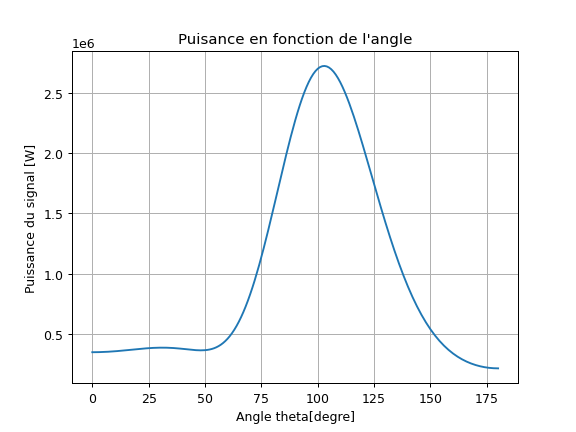

In [48]:
thetas = np.arange(0, 181, 1)
Power = []
for theta in thetas:
    W = []
    for i in range(N):
        W.append(beam_filter(antenne, Freq[k0], theta0 = theta, mic_nb= i))
    YW = M*W
    P = np.abs(np.sum(YW))**2
    Power.append(P)


plt.figure()
plt.plot(list(thetas), Power)
plt.xlabel("Angle theta[degre]")
plt.ylabel("Puissance du signal [W]")
plt.title("Puisance en fonction de l'angle")
plt.grid()
plt.show()

Le beamforming nous retourne donc bien un maximum aux alentours de 100 degré

### 12) Step (h) : Find the $\theta_0$ value corresponding to position of the maximum in $\texttt{P}$ and compare it with the actual (but approximate) position of the sound source.

In [62]:
theta_o=np.argmax(Power)
print("max de la puissance pour theta :",theta_o )
print("max puissnace",Power[theta_o])

max de la puissance pour theta : 103
max puissnace 2721753.543667142


Pendat l'acquisisition nous avions un réalité terrain de $\theta_0 = 100^\circ$ avec plus au moins 5° ( nous avons pas calculé avec exactitude l'angle).
L'angle pour le quel la puissance est maximale est de 103° qui est presque equivaut à la réalité terrain.

## 2.3/ Analyzing the beamformer performances

From now on, you can use your own code written in Section 2.2, or use the provided beamformer function which exactly reproduces the beamformer algorithm. You might then add $\texttt{from beamformer_etu import beamformer}$ in your Notebook before being able to use the beamformer function.

In [7]:
def beamforming(m, thetas, F0 , Fs):
    N, BLK = np.shape(m)
    Mfft = np.fft.fft(m)
    Freq = np.arange(0, Fs, Fs/BLK)
    k0 = (np.argmin(np.abs(Freq - F0)))

    #On selectionne pour chaque micro la fréquence d'interet k0
    M = Mfft[:, k0]
    Power = []    
    for theta in thetas:
        W = []
        for i in range(N):
            W.append(beam_filter(antenne, Freq[k0], theta0 = theta, mic_nb= i))
        YW = M*W
        P = np.abs(np.sum(YW))**2
        Power.append(P)
    return Power

<IPython.core.display.Javascript object>


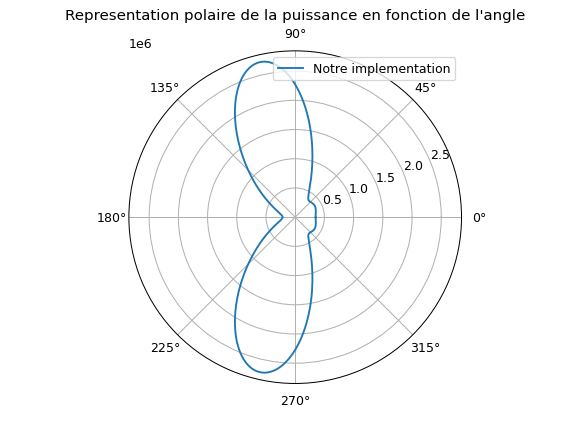

In [68]:
thetas = np.arange(0,180, 1)
plt.figure()
deg = np.arange(0, 360, 1)
plt.polar(deg*np.pi/180, beamforming(m, deg, 1000, Fs), label = "Notre implementation")
#plt.polar(deg*np.pi/180, bf.beamformer(m, deg, 1000, Fs), label = "Implémentaiton du prof")
plt.title("Representation polaire de la puissance en fonction de l'angle")
plt.legend()
plt.show()

### 13) Plot the energy maps you obtain when using source frequencies $F_0 = 400$Hz, $F_0 = 1$kHz, $F_0 = 2$kHz and $F_0 = 4$kHz emitting from a fixed arbitrary position. Comment and explain carefully the differences between these curves

In [33]:
P_500  = []
P_1000 = []
P_2000 = []
P_4000 = []

thetas = np.arange(0,180, 1)
Fs=20000

In [34]:
# f0= 500 Hz
antenne=array('play') 

In [35]:
F0=500
m_500= antenne.read()
P_500=beamforming(m_500, thetas, F0 , Fs)


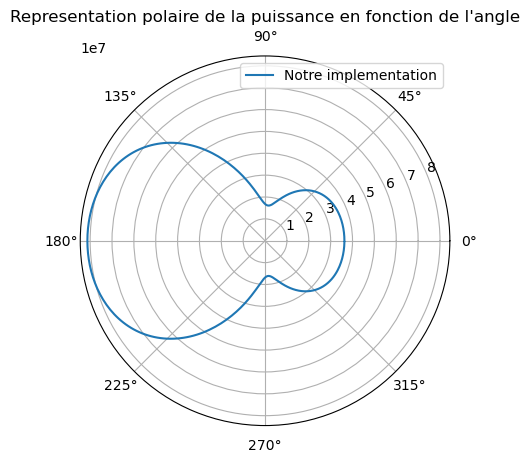

In [36]:
thetas = np.arange(0,180, 1)
plt.figure()
deg = np.arange(0, 360, 1)
plt.polar(deg*np.pi/180, beamforming(m_500, deg, 500, Fs), label = "Notre implementation")
#plt.polar(deg*np.pi/180, bf.beamformer(m, deg, 1000, Fs), label = "Implémentaiton du prof")
plt.title("Representation polaire de la puissance en fonction de l'angle")
plt.legend()
plt.show()

In [37]:
# f0= 1000 Hz
antenne=array('play') 

In [38]:
F0=1000
m_1000= antenne.read()
P_1000=beamforming(m_1000, thetas, F0 , Fs)

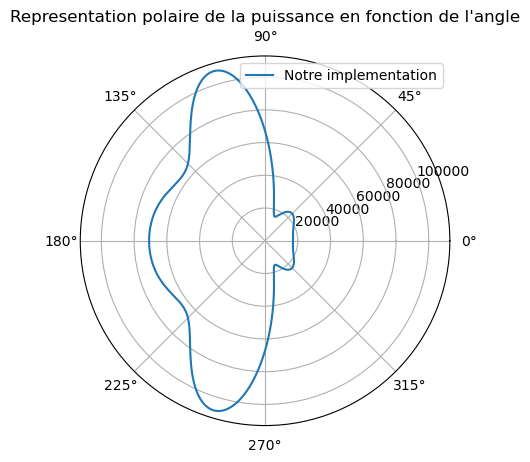

In [39]:
thetas = np.arange(0,180, 1)
plt.figure()
deg = np.arange(0, 360, 1)
plt.polar(deg*np.pi/180, beamforming(m_1000, deg, 1000, Fs), label = "Notre implementation")
#plt.polar(deg*np.pi/180, bf.beamformer(m, deg, 1000, Fs), label = "Implémentaiton du prof")
plt.title("Representation polaire de la puissance en fonction de l'angle")
plt.legend()
plt.show()

In [45]:
# f0= 2000 Hz
F0=2000
m_2000 = np.load(r'C:\Users\Brani\Downloads\Sound-processing-Master-ISI-Sorbonne-University-\acquisitions_tp2\q13_2000.npy')
P_2000=beamforming(m_2000, thetas, F0 , Fs)

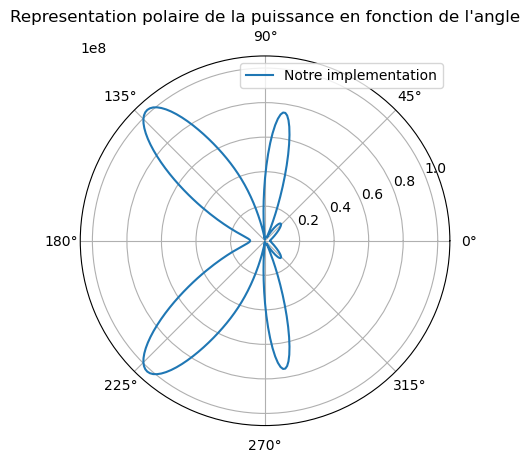

In [46]:
thetas = np.arange(0,180, 1)
plt.figure()
deg = np.arange(0, 360, 1)
plt.polar(deg*np.pi/180, beamforming(m_2000, deg, 2000, Fs), label = "Notre implementation")
#plt.polar(deg*np.pi/180, bf.beamformer(m, deg, 1000, Fs), label = "Implémentaiton du prof")
plt.title("Representation polaire de la puissance en fonction de l'angle")
plt.legend()
plt.show()

In [47]:
# f0= 4000 Hz
F0=4000
m_4000 = np.load(r'C:\Users\Brani\Downloads\Sound-processing-Master-ISI-Sorbonne-University-\acquisitions_tp2\q13_4000.npy')
P_4000=beamforming(m_4000, thetas, F0 , Fs)

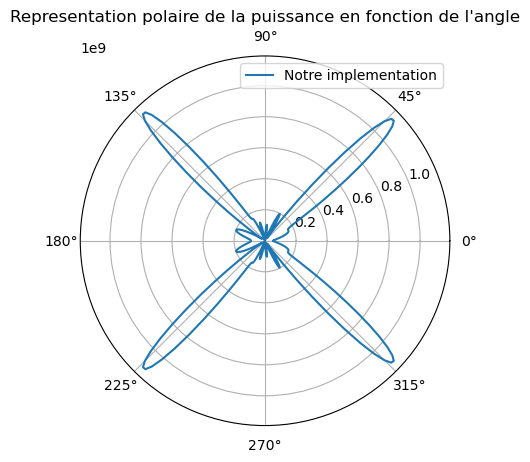

In [48]:
thetas = np.arange(0,180, 1)
plt.figure()
deg = np.arange(0, 360, 1)
plt.polar(deg*np.pi/180, beamforming(m_4000, deg, 4000, Fs), label = "Notre implementation")
#plt.polar(deg*np.pi/180, bf.beamformer(m, deg, 1000, Fs), label = "Implémentaiton du prof")
plt.title("Representation polaire de la puissance en fonction de l'angle")
plt.legend()
plt.show()

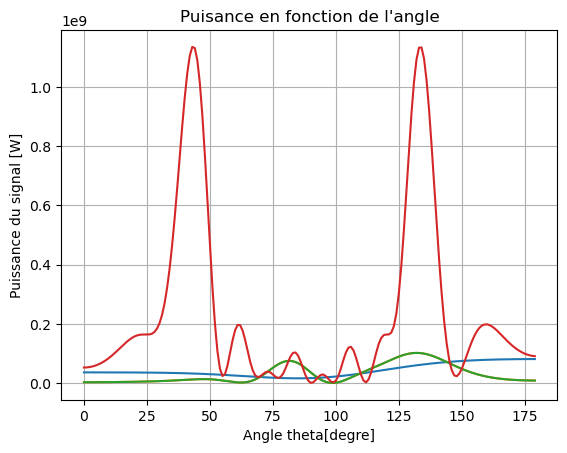

In [49]:
plt.figure()
plt.plot(list(thetas), P_500,  label='500  Hz')
plt.plot(list(thetas), P_1000, label='1000 Hz')
plt.plot(list(thetas), P_2000, label='2000 Hz')
plt.plot(list(thetas), P_4000, label='4000 Hz')
plt.xlabel("Angle theta[degre]")
plt.ylabel("Puissance du signal [W]")
plt.title("Puisance en fonction de l'angle")
plt.grid()
plt.show()

According to the figures above, the directivity pattern of an antenna varies with the frequency of interest. Therefore, an antenna is more directive as the frequency of interest increases. However, if the maximum value of the frequency of interest is exceeded (not respecting Shannon's theorem: $d < dmax = λmin * c/2fmax`), the directivity pattern lets through acoustic waves coming from different directions, this is described by a spectral folding in the frequency domain

In [50]:
P_1000[20]

4508988.104515901

2022-12-02 16:28:26,316 [CRITICAL]: in mu32.log (core_h5.py:252): Unexpected error:sleep length must be non-negative
Traceback (most recent call last):
  File "c:\Users\Brani\Downloads\Sound-processing-Master-ISI-Sorbonne-University-\mu32\core_h5.py", line 247, in ctrl_thread
    self.transfer_loop()
  File "c:\Users\Brani\Downloads\Sound-processing-Master-ISI-Sorbonne-University-\mu32\core_h5.py", line 475, in transfer_loop
    sleep( self._buffer_duration-time()+time_start-processing_delay )
ValueError: sleep length must be non-negative


Some comments

### 14) For a frequency $F_0 = 1$kHz and a source moving aroud the array, plot the estimated position as a function of time. Comment the effectiveness of the approach and its limits.

In [ ]:
# TO BE COMPLETED

Some comments